<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/08_cnn_cifar_10_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN CIFAR-10 Improved

In [ ]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [ ]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train.flatten()))

Epoch 1/30
1562/1562 [==============================] - 15s 10ms/step - loss: 1.3971 - accuracy: 0.5133 - val_loss: 1.1688 - val_accuracy: 0.6070
Epoch 2/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.9740 - accuracy: 0.6602 - val_loss: 0.9393 - val_accuracy: 0.6834
Epoch 3/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.8324 - accuracy: 0.7128 - val_loss: 0.9145 - val_accuracy: 0.6968
Epoch 4/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.7446 - accuracy: 0.7471 - val_loss: 0.8375 - val_accuracy: 0.7205
Epoch 5/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.6824 - accuracy: 0.7686 - val_loss: 0.6174 - val_accuracy: 0.7901
Epoch 6/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.6213 - accuracy: 0.7885 - val_loss: 0.6511 - val_accuracy: 0.7846
Epoch 7/30
1562/1562 [==============================] - 15s 10ms/step - loss: 0.5906 - accuracy: 0.7997 - val_loss: 0.6009 -

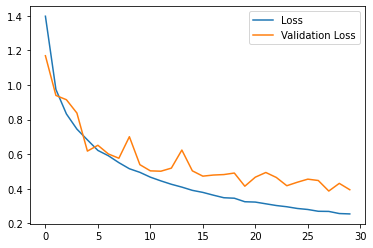

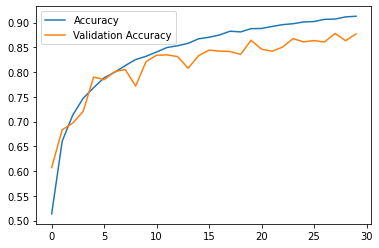

313/313 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8772
Accuracy: 0.8772000074386597


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch,
              epochs=30)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[917   3  32  10   5   4   3   4  15   7]
 [  5 963   0   1   1   0   1   0  10  19]
 [ 34   1 785  41  39  39  41  16   3   1]
 [ 16   4  25 735  33  75  65  29   9   9]
 [  9   1  21  28 871  14  28  24   4   0]
 [  7   1  13  92  12 815  24  31   1   4]
 [  5   1  16  22   4   2 943   4   1   2]
 [ 13   2   8  13  15  13   2 933   0   1]
 [ 52  10   4   3   2   3   2   2 909  13]
 [ 22  52   3   4   0   2   5   4   7 901]]


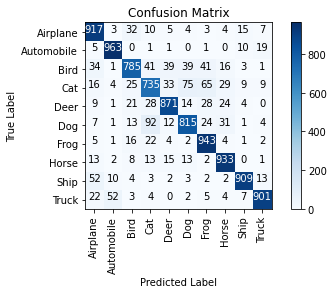

In [ ]:
labels = [
    'Airplane', 
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck',
]

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

## Display a random misclassified image

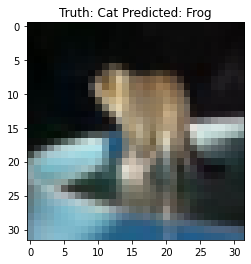

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i =  np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')
plt.show()